In [1]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = pd.read_csv("./Data/data.csv")
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
123,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
124,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
125,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [3]:
data.columns

Index(['Country', 'Region_x', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality', 'Region_y',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
sorted_by_Cropland_Footprint=data.sort_values(by='Total Ecological Footprint')

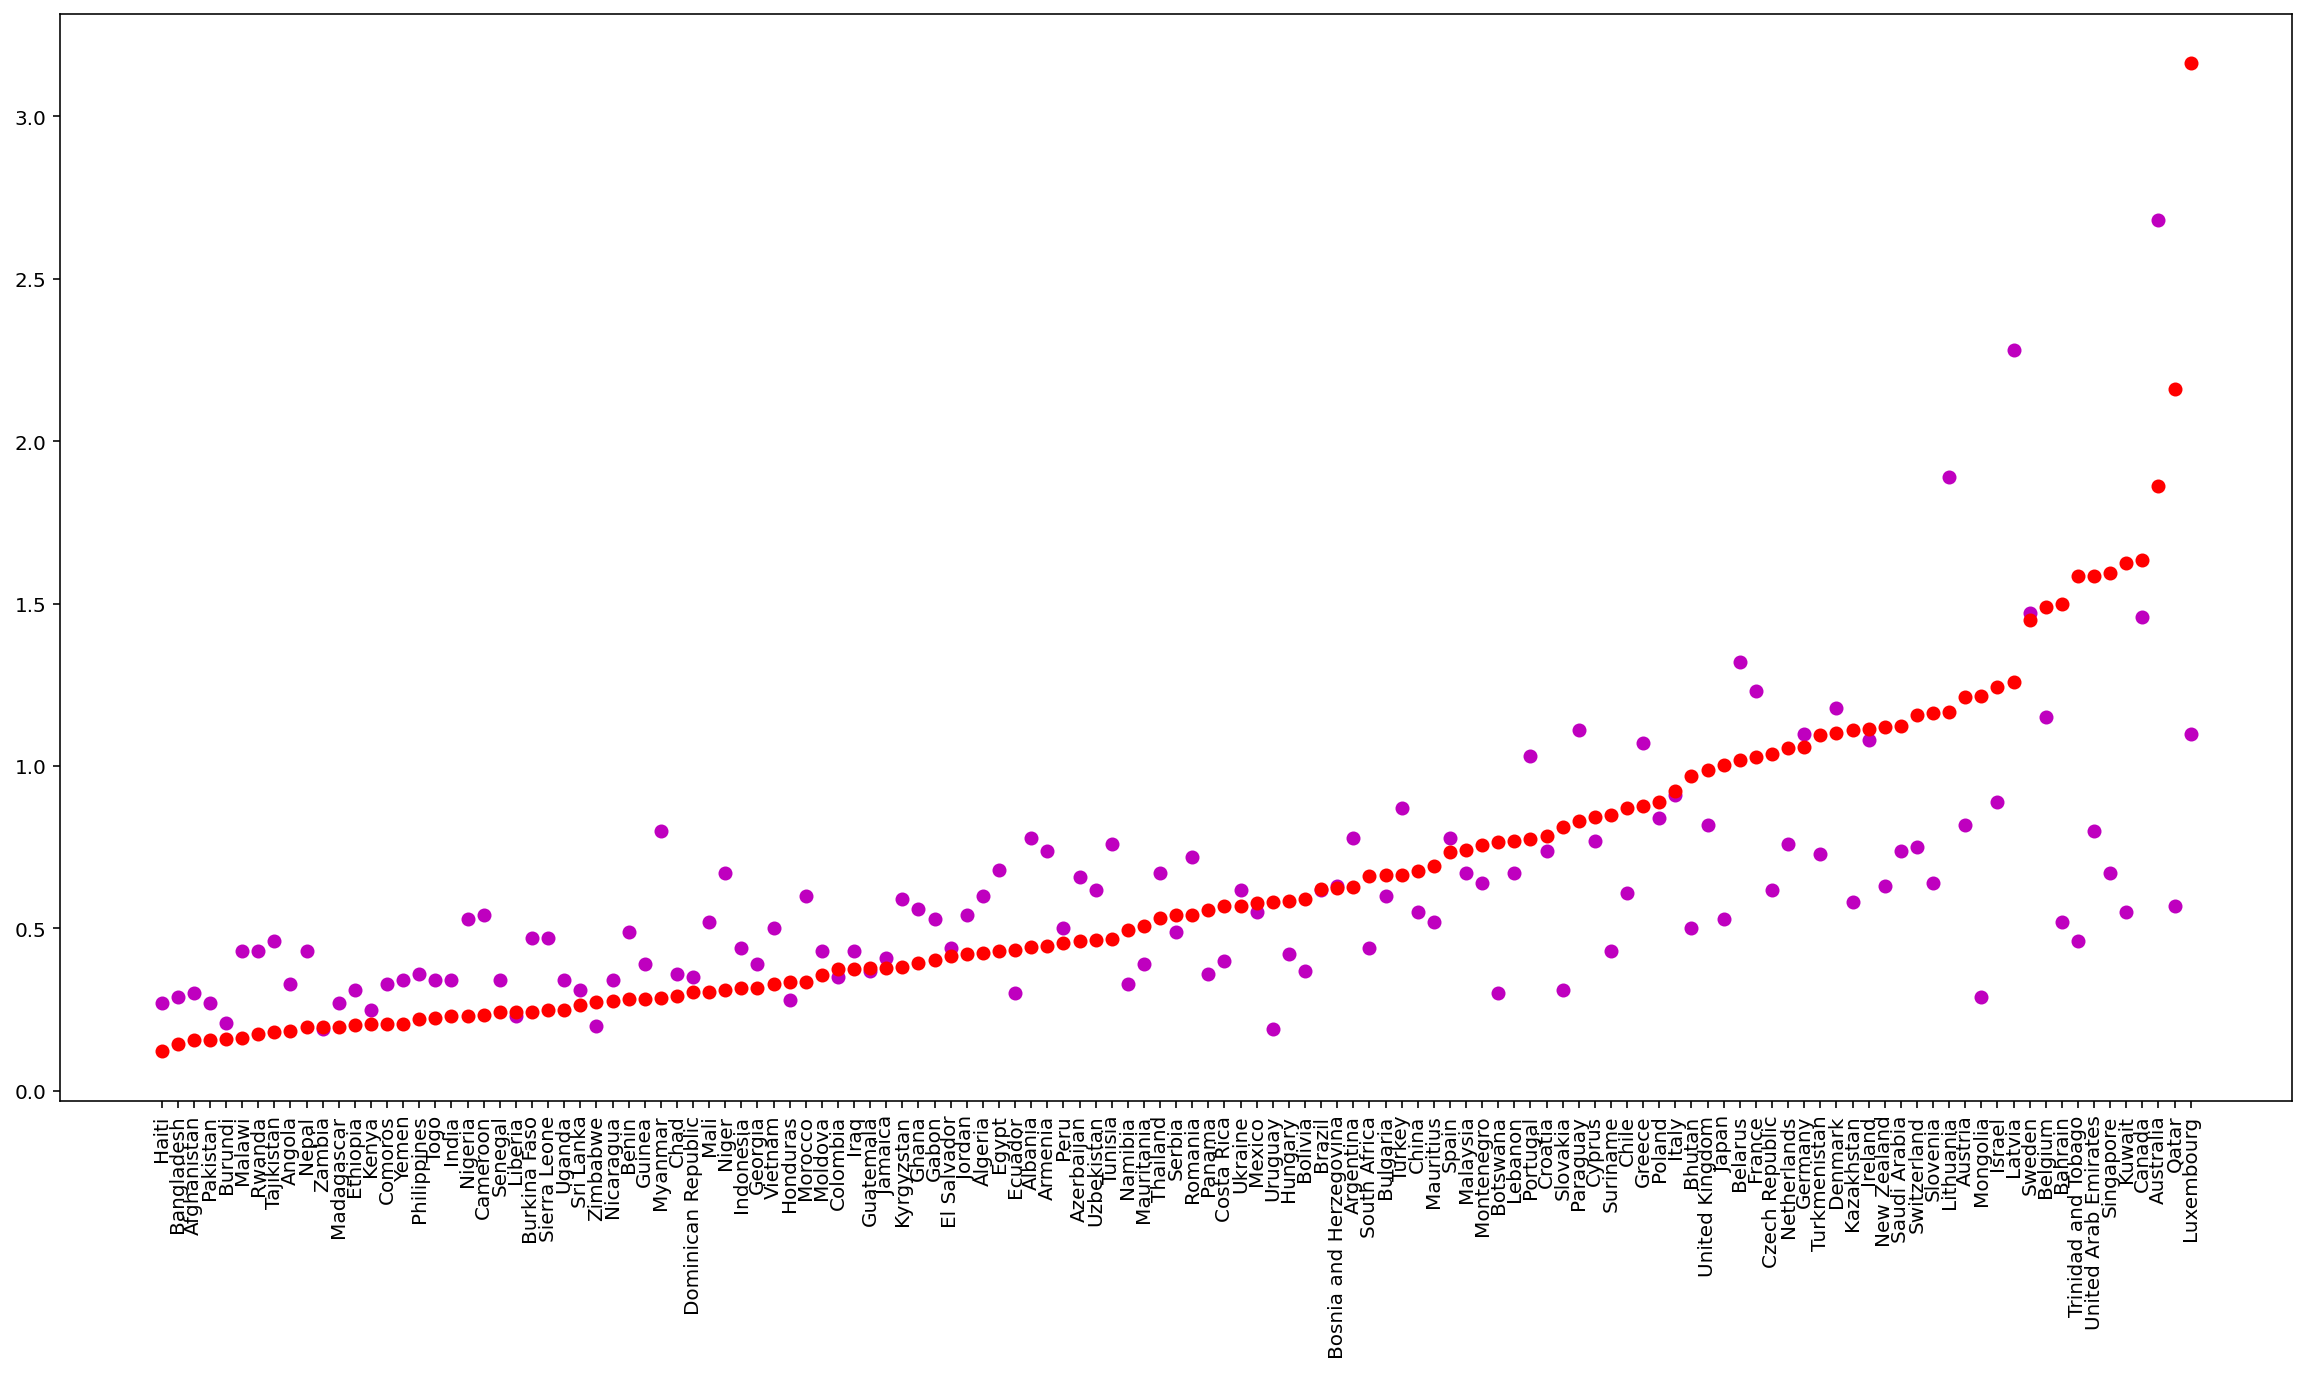

In [20]:
# try to find relation between footprints
plt.figure(figsize=(20, 10))
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Cropland Footprint'], marker='o', color='m')
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Total Ecological Footprint']/5, marker='o', color='r')
plt.xticks(rotation=90)
plt.show()

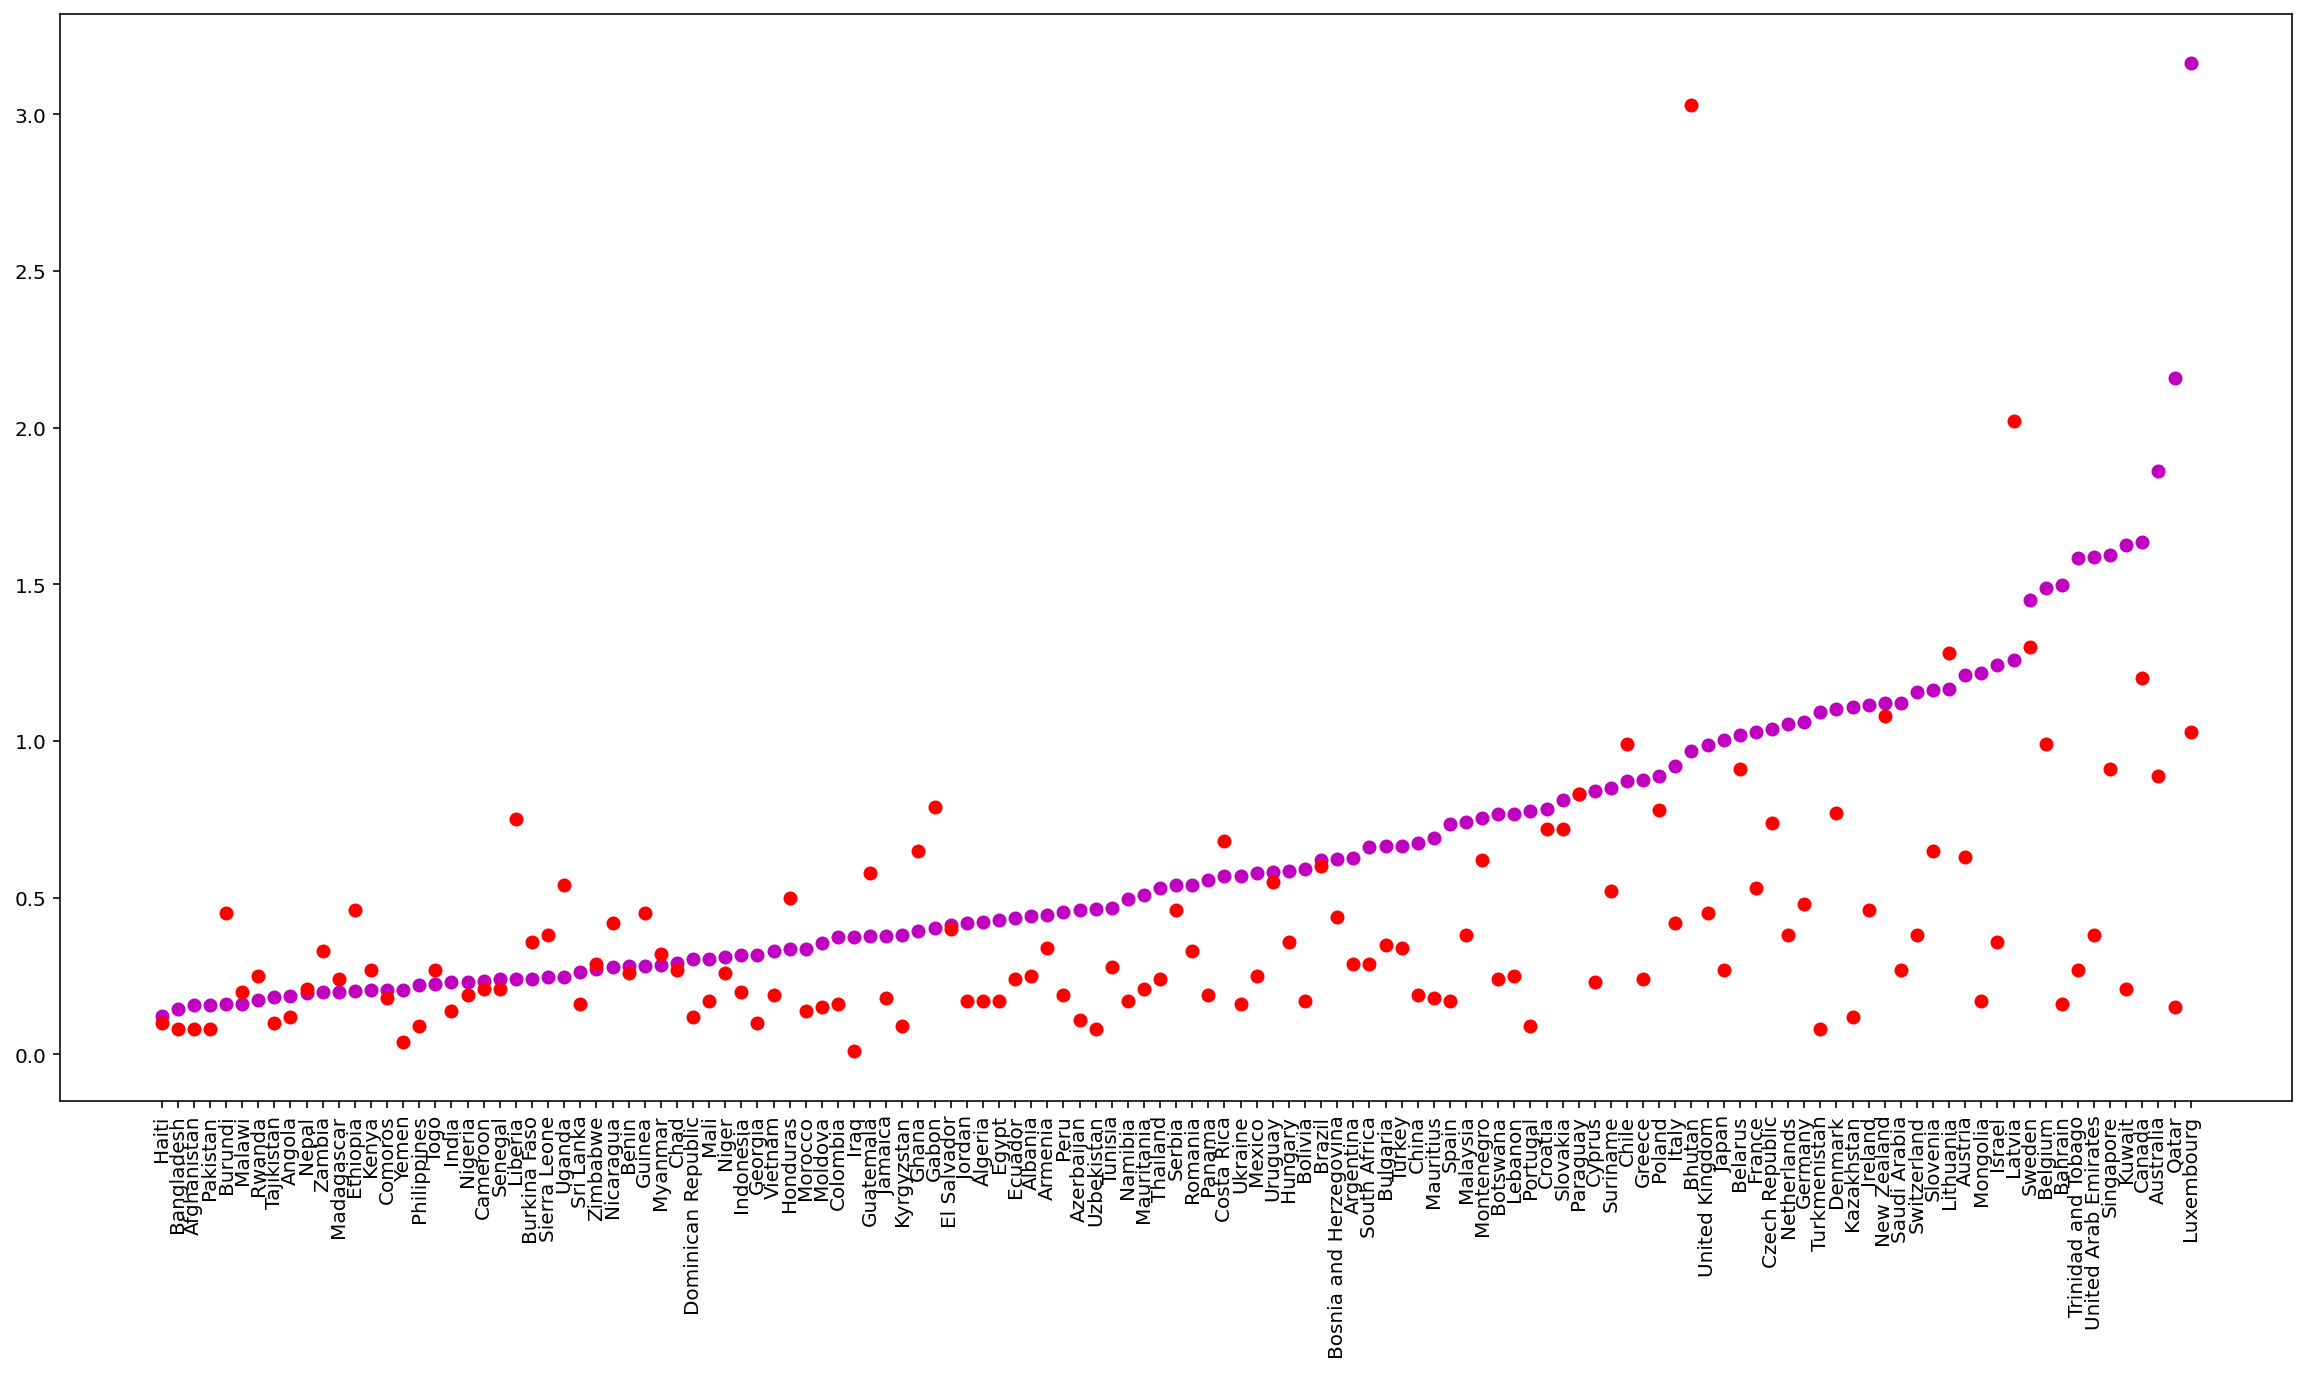

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Total Ecological Footprint']/5, marker='o', color='m')
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Forest Footprint'], marker='o', color='r')
plt.xticks(rotation=90)
plt.show()

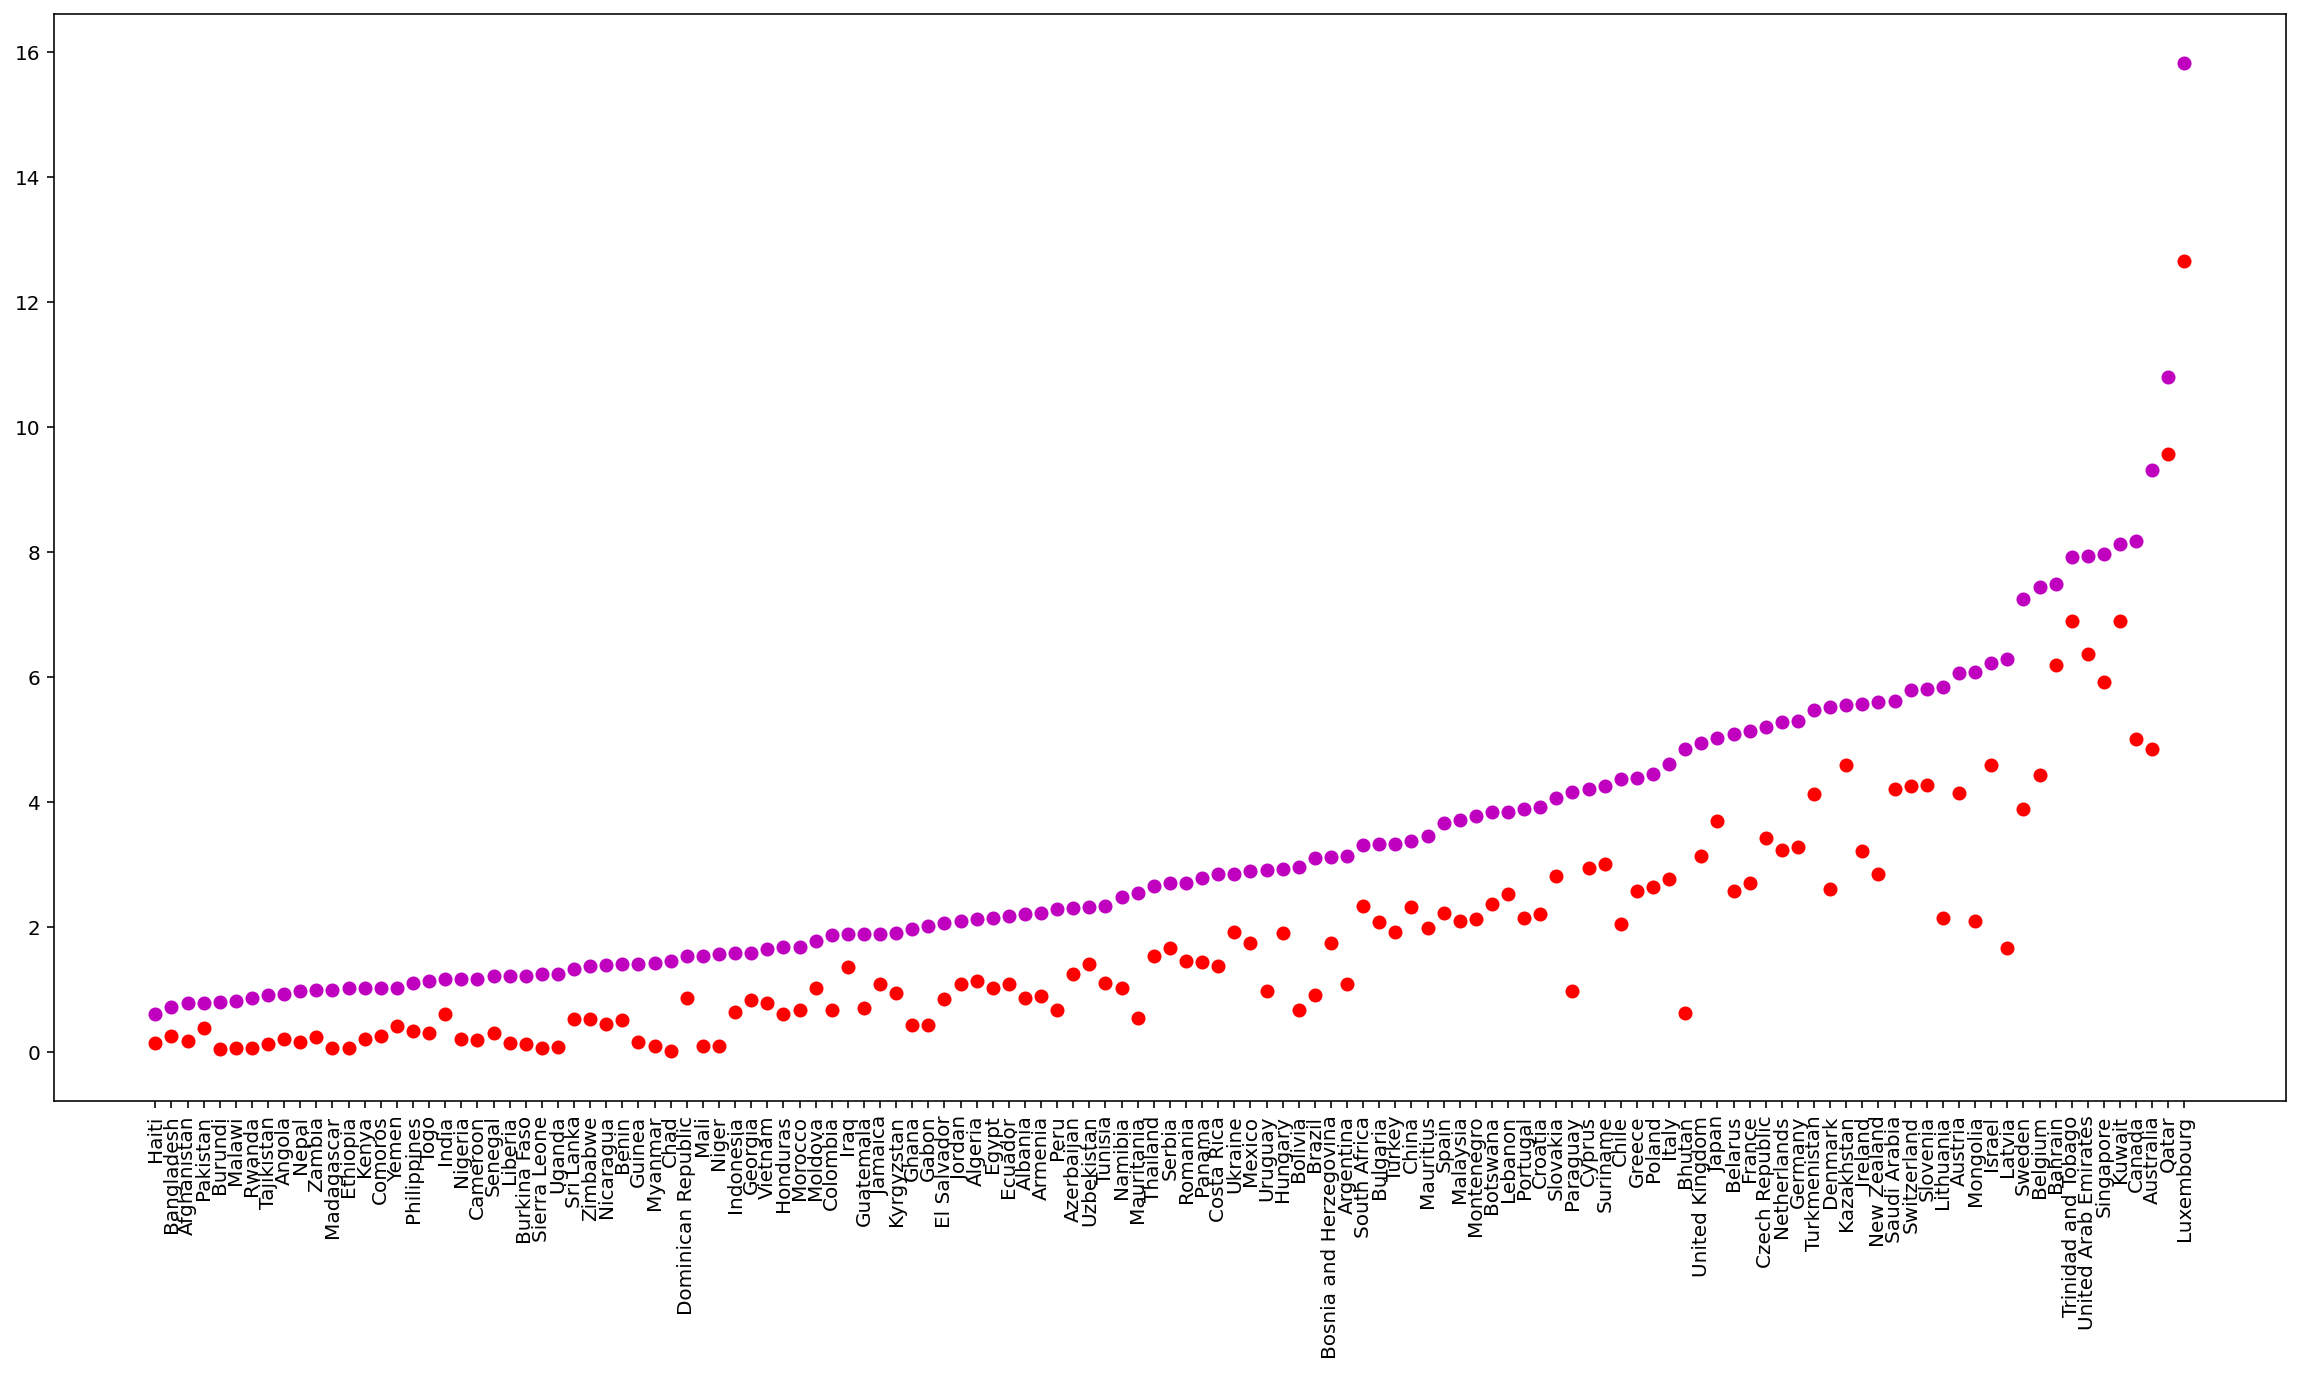

In [24]:
plt.figure(figsize=(20, 10))
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Total Ecological Footprint'], marker='o', color='m')
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Carbon Footprint'], marker='o', color='r')
plt.xticks(rotation=90)
plt.show()

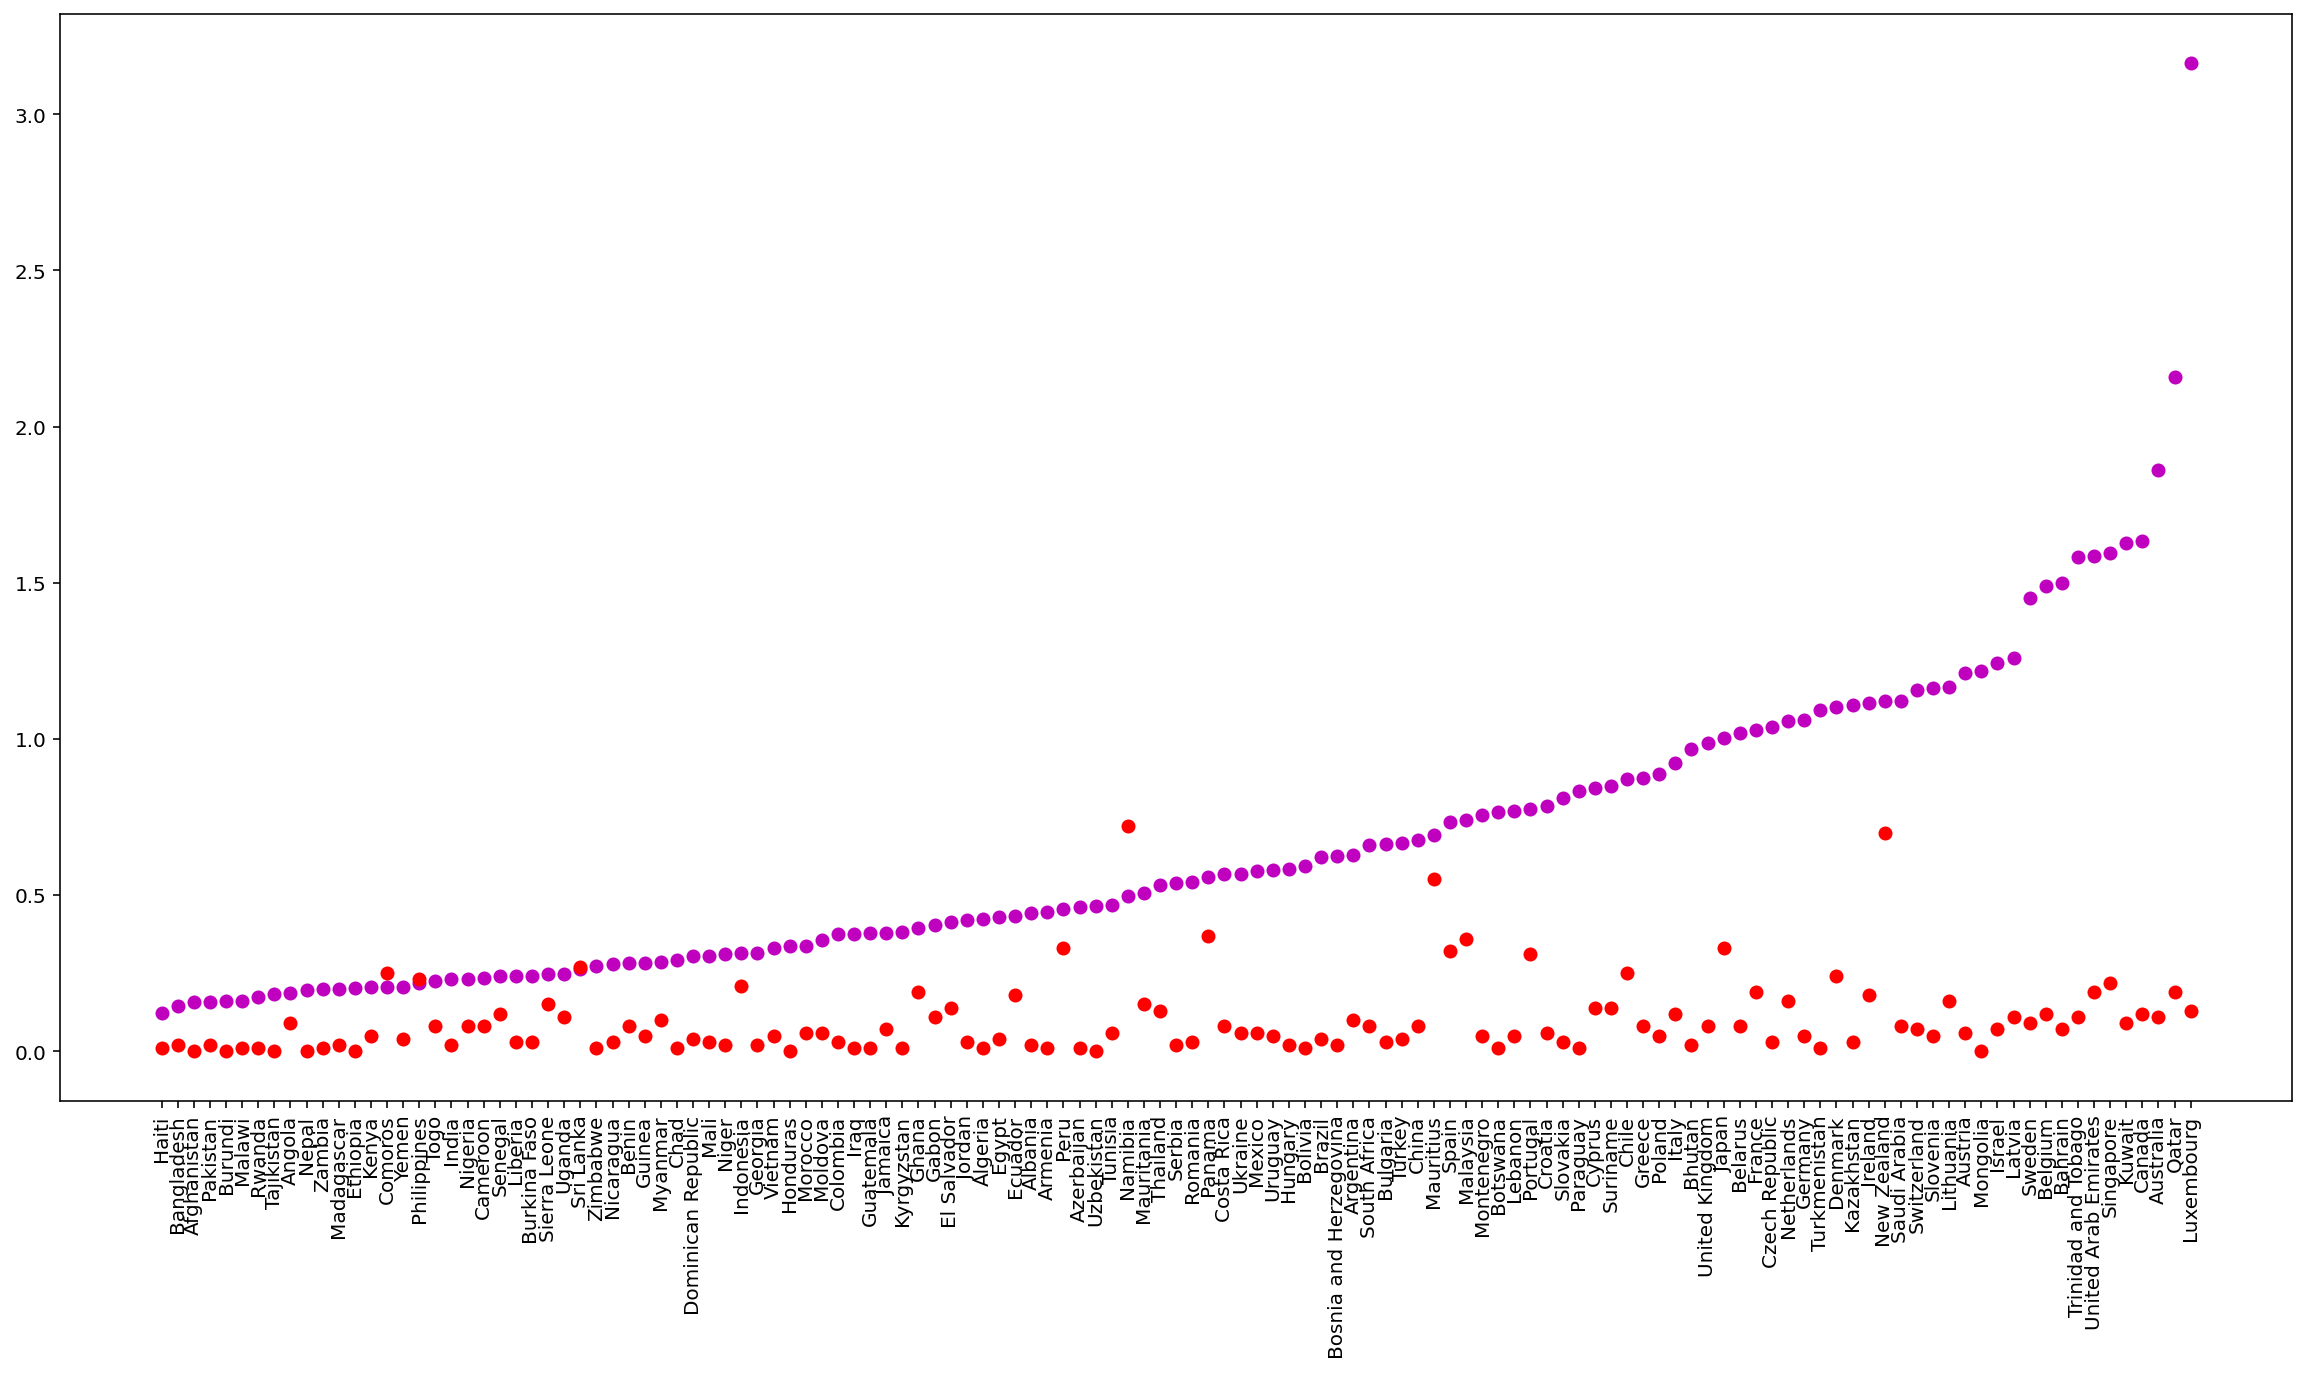

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Total Ecological Footprint']/5, marker='o', color='m')
plt.scatter(sorted_by_Cropland_Footprint['Country'], sorted_by_Cropland_Footprint['Fish Footprint'], marker='o', color='r')
plt.xticks(rotation=90)
plt.show()

In [40]:
cov_matrix = data[['Cropland Footprint','Grazing Footprint','Forest Footprint','Carbon Footprint','Fish Footprint','Total Ecological Footprint']].cov()
corr_crop_total = cov_matrix['Cropland Footprint']['Total Ecological Footprint']/np.sqrt(cov_matrix['Cropland Footprint']['Cropland Footprint']*cov_matrix['Total Ecological Footprint']['Total Ecological Footprint'])
corr_grazing_total = cov_matrix['Grazing Footprint']['Total Ecological Footprint']/np.sqrt(cov_matrix['Grazing Footprint']['Grazing Footprint']*cov_matrix['Total Ecological Footprint']['Total Ecological Footprint'])
corr_forest_total = cov_matrix['Forest Footprint']['Total Ecological Footprint']/np.sqrt(cov_matrix['Forest Footprint']['Forest Footprint']*cov_matrix['Total Ecological Footprint']['Total Ecological Footprint'])
corr_carbon_total = cov_matrix['Carbon Footprint']['Total Ecological Footprint']/np.sqrt(cov_matrix['Carbon Footprint']['Carbon Footprint']*cov_matrix['Total Ecological Footprint']['Total Ecological Footprint'])
corr_fish_total = cov_matrix['Fish Footprint']['Total Ecological Footprint']/np.sqrt(cov_matrix['Fish Footprint']['Fish Footprint']*cov_matrix['Total Ecological Footprint']['Total Ecological Footprint'])


In [44]:
print(corr_carbon_total)
print(corr_crop_total)
print(corr_forest_total)
print(corr_grazing_total)
print(corr_fish_total)

0.9493958760763774
0.5917118688345547
0.42693077880699787
0.2504362233458947
0.20195147266070523


In [42]:
cov_matrix

,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint
Cropland Footprint,0.141236,0.003564,0.072256,0.309940,0.004692,0.541887
Grazing Footprint,0.003564,0.149946,0.005901,0.077711,-0.003167,0.236315
Forest Footprint,0.072256,0.005901,0.153252,0.161879,0.003034,0.407274
Carbon Footprint,0.309940,0.077711,0.161879,4.014804,0.040760,4.635601
Fish Footprint,0.004692,-0.003167,0.003034,0.040760,0.014939,0.060150
Total Ecological Footprint,0.541887,0.236315,0.407274,4.635601,0.060150,5.938177


As we can see total ecological footprint is highly correlated with carbon footprint, which means it has most contribution to the ecological footprints. Also, from the covariance matrix 